<a href="https://colab.research.google.com/github/anthonymirandag/IndoorLocalization/blob/master/FingerprintingIndoorLocalizationDNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.** Importacion de librerias

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import io
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
!pip install tensorflow-gpu==2.0.0.alpha0
import datetime

     |████████████████████████████████| 332.1MB 48kB/s 
     |████████████████████████████████| 419kB 39.0MB/s 
     |████████████████████████████████| 3.0MB 31.1MB/s 


In [9]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or 

In [0]:
!pip install --upgrade tensorflow

     |████████████████████████████████| 86.3MB 161kB/s 
     |████████████████████████████████| 450kB 44.4MB/s 
     |████████████████████████████████| 3.8MB 34.9MB/s 
     |████████████████████████████████| 81kB 9.9MB/s 
ERROR: tensorboard 2.0.1 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.7.1 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalle

# **2.** Preprocedado de datos

## Carga de datos

In [0]:
#path_data = "/content/gdrive/My Drive/ProyectoTesis/datasets/Tx_full.csv"
path_data = 'https://raw.githubusercontent.com/anthonymirandag/IndoorLocalization/master/data/Tx_0x01.csv'
df = pd.read_csv(path_data)

In [0]:
target_label =  'Sector'

x = df.drop(target_label , axis= 1)
y = df[target_label]
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)
#y = df[target_label].astype(int) - 1 

## Normalizacion de los datos de entrada


In [0]:
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [0]:
x

array([[ 0.10518246,  0.98342957,  1.87879222, -0.32343564, -0.03082775],
       [ 0.61971557, -0.25637626,  1.59255362,  0.02782819,  1.05202996],
       [-0.06632858,  0.82845384,  1.87879222, -0.32343564, -0.21130404],
       ...,
       [-0.23783962,  0.82845384, -0.6973552 , -1.55285907,  1.41298253],
       [-0.23783962,  0.98342957, -0.6973552 , -1.37722715,  1.41298253],
       [-0.23783962,  0.82845384, -0.6973552 , -0.8503314 ,  1.41298253]])

## Division del conjunto de datos


In [0]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.10, random_state=27)

# **3.** Creacion del modelo : 
### Percentron multicapa.
 Hiperparametros :
* 3 capas ocultas con 128 neuronas
* Capa de activacion rectificador uniforme
* learning rate = 0.00001
* optimazador adam



In [10]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=64, activation='relu', input_shape=(5, )))
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dense(units=15, activation='softmax')),

(None,)

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                384       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 15)                975       
Total params: 9,679
Trainable params: 9,679
Non-trainable params: 0
_________________________________________________________________


### Compilar modelo

In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

### Entranar el modelo

In [14]:
history = model.fit(x_train, y_train, validation_split=0.25 ,batch_size=64, epochs=200 , verbose = 1)

Train on 4638 samples, validate on 1547 samples
Epoch 1/200
4638/4638 [==============================] - 1s 274us/sample - loss: 2.2208 - sparse_categorical_accuracy: 0.3616 - val_loss: 1.5394 - val_sparse_categorical_accuracy: 0.5326
Epoch 2/200
4638/4638 [==============================] - 0s 91us/sample - loss: 1.2724 - sparse_categorical_accuracy: 0.5869 - val_loss: 1.1132 - val_sparse_categorical_accuracy: 0.6070
Epoch 3/200
4638/4638 [==============================] - 0s 100us/sample - loss: 1.0589 - sparse_categorical_accuracy: 0.6227 - val_loss: 1.0157 - val_sparse_categorical_accuracy: 0.6264
Epoch 4/200
4638/4638 [==============================] - 0s 90us/sample - loss: 0.9872 - sparse_categorical_accuracy: 0.6436 - val_loss: 0.9649 - val_sparse_categorical_accuracy: 0.6548
Epoch 5/200
4638/4638 [==============================] - 0s 89us/sample - loss: 0.9308 - sparse_categorical_accuracy: 0.6514 - val_loss: 0.9220 - val_sparse_categorical_accuracy: 0.6665
Epoch 6/200
4638/463

### Plot training & validation accuracy values
### Plot training & validation loss values


In [0]:
def visualzation_accuracy_loss_values_epochs(history):
  fig, axs = plt.subplots(1, 2,figsize=(15, 5))
  axs[0].plot(history.history['sparse_categorical_accuracy'])
  axs[0].plot(history.history['val_sparse_categorical_accuracy'])
  axs[0].set_title('Model accuracy')
  axs[0].set_ylabel('Accuracy')
  axs[0].set_xlabel('Epoch')
  axs[0].legend(['Train', 'Test'], loc='upper left')
  axs[1].plot(history.history['loss'])
  axs[1].plot(history.history['val_loss'])
  axs[1].set_title('Model loss')
  axs[1].set_ylabel('Loss')
  axs[1].set_xlabel('Epoch')
  axs[1].legend(['Train', 'Test'], loc='upper left')


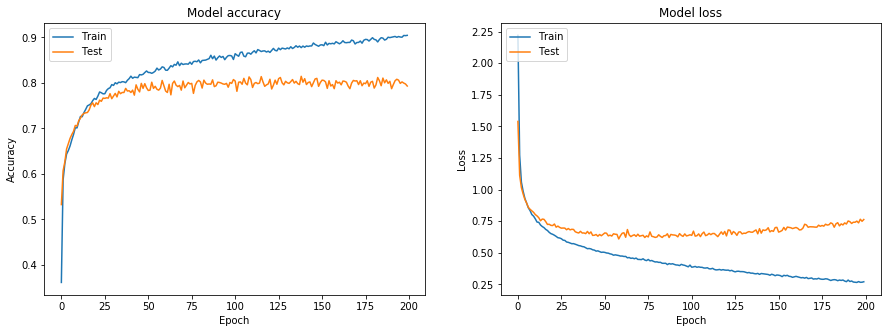

In [16]:
visualzation_accuracy_loss_values_epochs(history)

### Evaluación del modelo y predicción

In [17]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test accuracy: {}".format(test_accuracy))

688/688 [==============================] - 0s 110us/sample - loss: 0.7288 - sparse_categorical_accuracy: 0.7951
Test accuracy: 0.7950581312179565


## Metodos de regularizacion

#### Dropout

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=64, activation='relu', input_shape=(5, )))
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=15, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])


In [19]:
history = model.fit(x_train, y_train, validation_split=0.25 ,batch_size=64, epochs=200 , verbose = 1)

Train on 4638 samples, validate on 1547 samples
Epoch 1/200
4638/4638 [==============================] - 1s 153us/sample - loss: 2.2551 - sparse_categorical_accuracy: 0.2934 - val_loss: 1.6696 - val_sparse_categorical_accuracy: 0.4738
Epoch 2/200
4638/4638 [==============================] - 0s 99us/sample - loss: 1.4610 - sparse_categorical_accuracy: 0.5114 - val_loss: 1.1927 - val_sparse_categorical_accuracy: 0.5895
Epoch 3/200
4638/4638 [==============================] - 0s 99us/sample - loss: 1.2237 - sparse_categorical_accuracy: 0.5660 - val_loss: 1.0842 - val_sparse_categorical_accuracy: 0.6134
Epoch 4/200
4638/4638 [==============================] - 0s 95us/sample - loss: 1.1322 - sparse_categorical_accuracy: 0.6020 - val_loss: 1.0260 - val_sparse_categorical_accuracy: 0.6399
Epoch 5/200
4638/4638 [==============================] - 0s 98us/sample - loss: 1.0774 - sparse_categorical_accuracy: 0.6134 - val_loss: 0.9699 - val_sparse_categorical_accuracy: 0.6542
Epoch 6/200
4638/4638

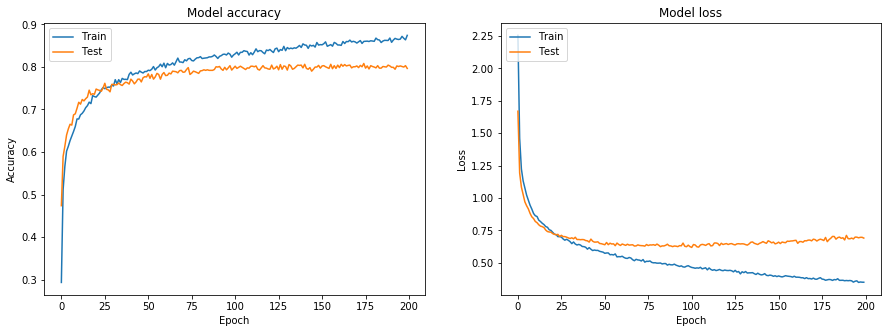

In [20]:
visualzation_accuracy_loss_values_epochs(history)

In [21]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test accuracy: {}".format(test_accuracy))

688/688 [==============================] - 0s 104us/sample - loss: 0.6689 - sparse_categorical_accuracy: 0.8169
Test accuracy: 0.8168604373931885


#### Early Stopping

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=64, activation='relu', input_shape=(5, )))
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dense(units=15, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])


In [0]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto',
        restore_best_weights=True)

In [24]:
history = model.fit(x_train, y_train, validation_split=0.25 ,callbacks=[monitor],batch_size=64, epochs=200 , verbose = 1)

Train on 4638 samples, validate on 1547 samples
Epoch 1/200
4638/4638 [==============================] - 1s 141us/sample - loss: 2.1127 - sparse_categorical_accuracy: 0.4181 - val_loss: 1.4798 - val_sparse_categorical_accuracy: 0.5527
Epoch 2/200
4638/4638 [==============================] - 0s 91us/sample - loss: 1.2682 - sparse_categorical_accuracy: 0.5858 - val_loss: 1.1684 - val_sparse_categorical_accuracy: 0.5895
Epoch 3/200
4638/4638 [==============================] - 0s 88us/sample - loss: 1.0990 - sparse_categorical_accuracy: 0.6164 - val_loss: 1.0617 - val_sparse_categorical_accuracy: 0.6225
Epoch 4/200
4638/4638 [==============================] - 0s 91us/sample - loss: 1.0212 - sparse_categorical_accuracy: 0.6272 - val_loss: 1.0048 - val_sparse_categorical_accuracy: 0.6348
Epoch 5/200
4638/4638 [==============================] - 0s 94us/sample - loss: 0.9639 - sparse_categorical_accuracy: 0.6507 - val_loss: 0.9643 - val_sparse_categorical_accuracy: 0.6574
Epoch 6/200
4638/4638

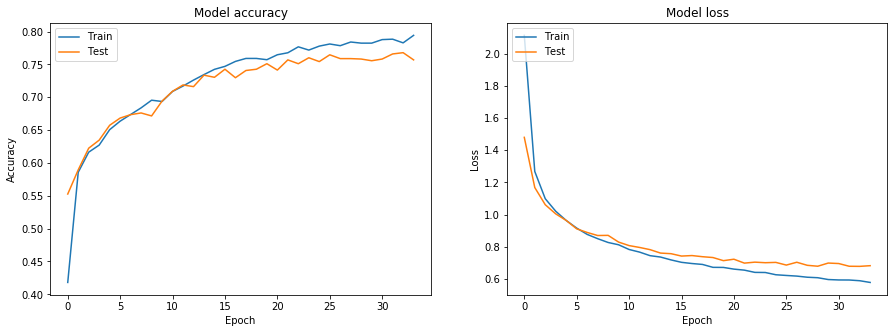

In [25]:
visualzation_accuracy_loss_values_epochs(history)

In [26]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test accuracy: {}".format(test_accuracy))

688/688 [==============================] - 0s 109us/sample - loss: 0.6840 - sparse_categorical_accuracy: 0.7907
Test accuracy: 0.7906976938247681


####Dropout +  Early Stopping


In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=64, activation='relu', input_shape=(5, )))
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=15, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

In [0]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto',
        restore_best_weights=True)

In [29]:
history = model.fit(x_train, y_train, validation_split=0.25 ,callbacks=[monitor],batch_size=64, epochs=200 , verbose = 1)

Train on 4638 samples, validate on 1547 samples
Epoch 1/200
4638/4638 [==============================] - 1s 155us/sample - loss: 2.2319 - sparse_categorical_accuracy: 0.3228 - val_loss: 1.5840 - val_sparse_categorical_accuracy: 0.5152
Epoch 2/200
4638/4638 [==============================] - 0s 99us/sample - loss: 1.4036 - sparse_categorical_accuracy: 0.5364 - val_loss: 1.1661 - val_sparse_categorical_accuracy: 0.5973
Epoch 3/200
4638/4638 [==============================] - 0s 95us/sample - loss: 1.2094 - sparse_categorical_accuracy: 0.5683 - val_loss: 1.0714 - val_sparse_categorical_accuracy: 0.6122
Epoch 4/200
4638/4638 [==============================] - 0s 99us/sample - loss: 1.1131 - sparse_categorical_accuracy: 0.5953 - val_loss: 1.0183 - val_sparse_categorical_accuracy: 0.6290
Epoch 5/200
4638/4638 [==============================] - 0s 94us/sample - loss: 1.0566 - sparse_categorical_accuracy: 0.6246 - val_loss: 0.9645 - val_sparse_categorical_accuracy: 0.6542
Epoch 6/200
4638/4638

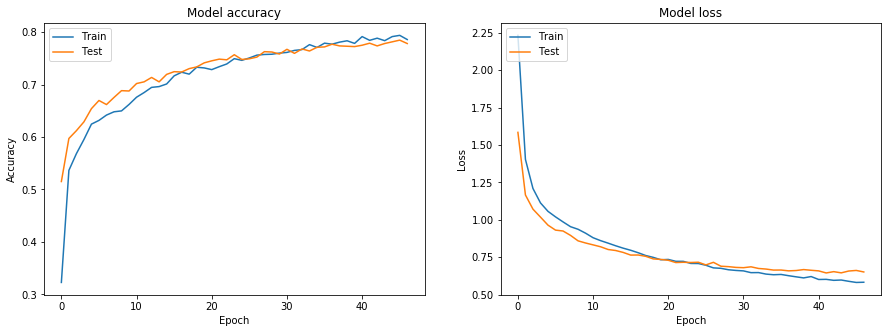

In [30]:
visualzation_accuracy_loss_values_epochs(history)

In [31]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test accuracy: {}".format(test_accuracy))

688/688 [==============================] - 0s 103us/sample - loss: 0.6359 - sparse_categorical_accuracy: 0.7951
Test accuracy: 0.7950581312179565
